#Exploración de datos
## Welovebeer.py - Brewing Data Cup 2020

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Exploración de datos "Estructura"

<table>
<thead>
<tr>
<th>Variable</th>
<th>Descripción</th>
</tr>
</thead>
<tbody>
<tr>
<td>Cliente</td>
<td>Id del Establecimiento (Llave primaria)</td>
</tr>
<tr>
<td>Regional2</td>
<td>Región donde se encuentra ubicado (Conjunto de departamentos)</td>
</tr>
<tr>
<td>Gerencia2</td>
<td>Gerencia que le distribuye el producto (Conjunto de 1, 2 o mas ciudades)</td>
</tr>
<tr>
<td>SubCanal2</td>
<td>Tipo de establecimiento: (Tienda, Bar, etc)</td>
</tr>
<tr>
<td>Categoria</td>
<td>Variable definida por AB-Inbev para calificar la importancia de un establecimiento dada su compra histórica.</td>
</tr>
<tr>
<td>Nevera</td>
<td>Variable dummie que me permite ver si el establecimiento tiene o no una nevera en su punto de venta.</td>
</tr>
</tbody>
</table>


In [ ]:
data1 = pd.read_csv("Input1_clientes_estructura.csv", sep=";")
data1

,Cliente,Regional2,Gerencia2,SubCanal2,Categoria,Nevera
0,1,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0
1,2,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0
2,3,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,0
3,4,Regional 1,Gerencia_1,Subcanal_1,Categoria_1,1
4,5,Regional 1,Gerencia_1,Subcanal_1,Categoria_2,1
...,...,...,...,...,...,...
20916,20917,Regional 1,Gerencia_1,Subcanal_31,Categoria_2,0
20917,20918,Regional 1,Gerencia_4,Subcanal_31,Categoria_1,0
20918,20919,Regional 1,Gerencia_9,Subcanal_31,Categoria_1,0
20919,20920,Regional 1,Gerencia_10,Subcanal_31,Categoria_1,0


### Revisión de cantidad de valores repetidos por columna

Para saber cuantas gerencias, subcanales y categorías hay. Así como también el porcentage de clientes que tienen o no neveras

In [ ]:
data1.Regional2.value_counts()

Regional 1    20921
Name: Regional2, dtype: int64

In [ ]:
data1.Gerencia2.value_counts()

Gerencia_10    5441
Gerencia_6     3074
Gerencia_8     2634
Gerencia_9     2519
Gerencia_4     1971
Gerencia_3     1860
Gerencia_1     1353
Gerencia_2     1189
Gerencia_5      604
Gerencia_7      223
Gerencia_11      53
Name: Gerencia2, dtype: int64

In [ ]:
data1.SubCanal2.value_counts()

Subcanal_3     8217
Subcanal_1     2169
Subcanal_4     1503
Subcanal_5     1337
Subcanal_31    1283
Subcanal_2     1245
Subcanal_6     1167
Subcanal_11    1072
Subcanal_8     1014
Subcanal_10     689
Subcanal_9      321
Subcanal_7      240
Subcanal_15      99
Subcanal_14      86
Subcanal_19      63
Subcanal_13      61
Subcanal_21      60
Subcanal_18      56
Subcanal_17      46
Subcanal_25      37
Subcanal_20      31
Subcanal_16      30
Subcanal_12      30
Subcanal_26      23
Subcanal_23      15
Subcanal_30      15
Subcanal_22       4
Subcanal_24       3
Subcanal_28       2
Subcanal_27       1
Subcanal_32       1
Subcanal_29       1
Name: SubCanal2, dtype: int64

In [ ]:
data1.Categoria.value_counts()

Categoria_2    8773
Categoria_3    5454
Categoria_1    5195
Categoria_4     898
Categoria_5     454
Categoria_6     147
Name: Categoria, dtype: int64

In [ ]:
data1.Nevera.value_counts("%")

0    0.60217
1    0.39783
Name: Nevera, dtype: float64

### Creamos una exploración de datos mejor con la libreria [Pandas-Profiling](https://github.com/pandas-profiling/pandas-profiling)

In [ ]:
!pip install Pandas-Data-Exploration-Utility-Package
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     | 56.1MB 1.1MB/s
     |████████████████████████████████| 71kB 4.0MB/s 
     |████████████████████████████████| 604kB 11.2MB/s 
     |████████████████████████████████| 3.1MB 18.3MB/s 
     |████████████████████████████████| 71kB 7.0MB/s 
     |████████████████████████████████| 296kB 40.4MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.9.0-py2.py3-none-any.whl size=258952 sha256=23b24f60ef9a716e82f10ef36fb24352602b7d36a3930e23ad909b895d8b636c
  Stored in directory: /tmp/pip-ephem-wheel-cache-bd6b5r2d/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=6cd992bb5a94a351f98b32b89839aa013d2b772e31ecc083b0e3ed0d1d0a8cd9
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built pandas-profiling htmlmin
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully unin

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(data1, 
                        title="Pandas Profiling Report",
                        html={'style':{'full_width':True}},minimal=True)
profile

Con este reporte podemos ver:
* No tenemos valores nulos en el dataset.
* La mayoría de clientes se encuentran en la Categoría 2.
* La mayoría de clientes se encuentran en el Subcanal3.
* La mayoría de clientes se encuentran en la Gerencia_10. 
* La mayoría de clientes **no** tiene nevera en su punto de venta.

## Exploración de datos "Venta"

<table>
<thead>
<tr>
<th>Variable</th>
<th>Descripción</th>
</tr>
</thead>
<tbody>
<tr>
<td>Año</td>
<td>Año en el que se realiza la compra</td>
</tr>
<tr>
<td>Mes</td>
<td>Mes en el que se realiza la compra</td>
</tr>
<tr>
<td>Cliente</td>
<td>Id del establecimiento</td>
</tr>
<tr>
<td>SegmentoPrecio2</td>
<td>Categoría de la marca, dado el ingreso por litro a la compañía.</td>
</tr>
<tr>
<td>Marca2</td>
<td>Marca vendida</td>
</tr>
<tr>
<td>Cupo2</td>
<td>Tipo de envase de la marca vendida</td>
</tr>
<tr>
<td>CapacidadEnvase2</td>
<td>Capacidad en volumen, de la Marca2-Cupo2 vendido.</td>
</tr>
<tr>
<td>Volumen</td>
<td>Cantidad de volumen vendido de la Marca-Cupo2-CapacidadEnvase2</td>
</tr>
<tr>
<td>disc</td>
<td>Descuentos otorgados al establecimiento por la compra</td>
</tr>
<tr>
<td>nr</td>
<td>NetRevenue que dejó la venta a la compañía.</td>
</tr>
</tbody>
</table>


In [ ]:
data2 = pd.read_csv("Input2_clientes_venta.csv", sep=";")
data2

,Año,Mes,Cliente,SegmentoPrecio2,Marca2,Cupo2,CapacidadEnvase2,Volumen,disc,nr
0,2019,5,10,SegmentoPrecio_1,Marca_1,Cupo_1,CapacidadEnvase_12,0.112229,-30.590603,900.328567
1,2019,5,10,SegmentoPrecio_1,Marca_2,Cupo_2,CapacidadEnvase_10,0.021734,0.000000,149.184463
2,2019,5,10,SegmentoPrecio_2,Marca_3,Cupo_2,CapacidadEnvase_10,0.043469,0.000000,359.625828
3,2019,5,10,SegmentoPrecio_1,Marca_1,Cupo_2,CapacidadEnvase_16,0.026345,-31.065261,134.748399
4,2019,5,10,SegmentoPrecio_1,Marca_4,Cupo_2,CapacidadEnvase_10,0.086938,0.000000,496.901005
...,...,...,...,...,...,...,...,...,...,...
1406111,2020,8,20577,SegmentoPrecio_3,Marca_39,Cupo_2,CapacidadEnvase_10,0.039122,0.000000,544.150314
1406112,2020,7,20580,SegmentoPrecio_1,Marca_38,Cupo_2,CapacidadEnvase_10,0.000000,0.000000,0.000000
1406113,2020,7,20580,SegmentoPrecio_3,Marca_39,Cupo_2,CapacidadEnvase_10,0.058683,0.000000,759.218996
1406114,2020,9,20580,SegmentoPrecio_1,Marca_38,Cupo_2,CapacidadEnvase_10,0.000000,0.000000,0.000000


In [ ]:
data2.Cliente.value_counts()

14162    591
5240     493
5193     464
5815     464
3333     459
        ... 
4767       1
11932      1
8849       1
19520      1
1527       1
Name: Cliente, Length: 17010, dtype: int64

In [ ]:
data2.Marca2.value_counts("%")

Marca_1     0.289113
Marca_5     0.184333
Marca_4     0.111791
Marca_6     0.090895
Marca_9     0.056233
Marca_7     0.047676
Marca_2     0.031743
Marca_3     0.028454
Marca_15    0.027605
Marca_16    0.021394
Marca_8     0.019016
Marca_12    0.016433
Marca_17    0.010135
Marca_20    0.008472
Marca_10    0.008115
Marca_38    0.006464
Marca_39    0.006464
Marca_11    0.005610
Marca_14    0.005268
Marca_24    0.003581
Marca_23    0.003540
Marca_22    0.003281
Marca_25    0.002899
Marca_13    0.002011
Marca_29    0.001924
Marca_19    0.001114
Marca_32    0.001077
Marca_26    0.001002
Marca_18    0.000999
Marca_28    0.000915
Marca_27    0.000800
Marca_30    0.000777
Marca_31    0.000499
Marca_35    0.000153
Marca_21    0.000116
Marca_36    0.000041
Marca_34    0.000032
Marca_33    0.000013
Marca_37    0.000009
Name: Marca2, dtype: float64

Vemos que la **Marca_1** tiene un 28% de compra, mientras que las Marcas de Innovación (38 y 39), tienen un 0.6% de compra.

### Creamos una exploración de datos mejor con la libreria [Pandas-Profiling](https://github.com/pandas-profiling/pandas-profiling)

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(data2, 
                        title="Pandas Profiling Report",
                        html={'style':{'full_width':True}},minimal=True)
profile

De estos datos podemos analizar que:
* Hay mayor venta de **Mayo** a **Agosto**
* El cliente 14162 es el mayor comprador
* El segmentoprecio_1 es el más común
* La Marca_1 es la que más se vende con un 28.9% de frecuencia y 406526 pedidos
* La marca_9 tiene un pedido del 5.6% y la Marca_16 de un 2.1%, estas se encuentran en el Top 10 de Marcas pedidas.
* El Cupo_2 (tipo de envase) es el más frecuente con un 56% del mercado
* La CapacidadEnvase_10 es la de mayor frequencia con 50%

In [ ]:
data2.groupby(["Cliente",'Marca2', 'Cupo2', 'CapacidadEnvase2']).size().to_frame().sort_values(by=0, ascending=False).reset_index()

,Cliente,Marca2,Cupo2,CapacidadEnvase2,0
0,14872,Marca_4,Cupo_2,CapacidadEnvase_10,17
1,9736,Marca_5,Cupo_2,CapacidadEnvase_10,17
2,6791,Marca_1,Cupo_2,CapacidadEnvase_10,17
3,8052,Marca_1,Cupo_2,CapacidadEnvase_16,17
4,6790,Marca_5,Cupo_2,CapacidadEnvase_10,17
...,...,...,...,...,...
280092,6489,Marca_3,Cupo_1,CapacidadEnvase_6,1
280093,6489,Marca_3,Cupo_2,CapacidadEnvase_10,1
280094,13427,Marca_7,Cupo_3,CapacidadEnvase_8,1
280095,6489,Marca_4,Cupo_2,CapacidadEnvase_16,1


## Merging de tablas para modelo y análisis de datos

In [ ]:
data = data2.merge(data1, left_on='Cliente', right_on='Cliente')
data

,Año,Mes,Cliente,SegmentoPrecio2,Marca2,Cupo2,CapacidadEnvase2,Volumen,disc,nr,Regional2,Gerencia2,SubCanal2,Categoria,Nevera
0,2019,5,10,SegmentoPrecio_1,Marca_1,Cupo_1,CapacidadEnvase_12,0.112229,-30.590603,900.328567,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1
1,2019,5,10,SegmentoPrecio_1,Marca_2,Cupo_2,CapacidadEnvase_10,0.021734,0.000000,149.184463,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1
2,2019,5,10,SegmentoPrecio_2,Marca_3,Cupo_2,CapacidadEnvase_10,0.043469,0.000000,359.625828,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1
3,2019,5,10,SegmentoPrecio_1,Marca_1,Cupo_2,CapacidadEnvase_16,0.026345,-31.065261,134.748399,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1
4,2019,5,10,SegmentoPrecio_1,Marca_4,Cupo_2,CapacidadEnvase_10,0.086938,0.000000,496.901005,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406111,2020,8,20577,SegmentoPrecio_3,Marca_39,Cupo_2,CapacidadEnvase_10,0.039122,0.000000,544.150314,Regional 1,Gerencia_8,Subcanal_3,Categoria_2,0
1406112,2020,7,20580,SegmentoPrecio_1,Marca_38,Cupo_2,CapacidadEnvase_10,0.000000,0.000000,0.000000,Regional 1,Gerencia_10,Subcanal_5,Categoria_6,0
1406113,2020,7,20580,SegmentoPrecio_3,Marca_39,Cupo_2,CapacidadEnvase_10,0.058683,0.000000,759.218996,Regional 1,Gerencia_10,Subcanal_5,Categoria_6,0
1406114,2020,9,20580,SegmentoPrecio_1,Marca_38,Cupo_2,CapacidadEnvase_10,0.000000,0.000000,0.000000,Regional 1,Gerencia_10,Subcanal_5,Categoria_6,0


## Creación de la variable **Target**


<table>
<thead>
<tr>
<th>Target</th>
<th>Descripción</th>
</tr>
</thead>
<tbody>
<tr>
<td>1</td>
<td>Marca1: Marca_20 - Cupo_3 - CapacidadEnvase_9</td>
</tr>
<tr>
<td>2</td>
<td>Marca2: Marca_16- Cupo_2 - CapacidadEnvase_10</td>
</tr>
<tr>
<td>3</td>
<td>Marca3: Marca_9-Cupo_3-CapacidadEnvase_12</td>
</tr>
<tr>
<td>4</td>
<td>Marca_Inno1: Marca_38- Cupo_2 -CapacidadEnvase_10</td>
</tr>
<tr>
<td>5</td>
<td>Marca_Inno2: Marca_39-Cupo_2-CapacidadEnvase_10</td>
</tr>
<tr>
<td>0</td>
<td>Ningúna de las anteriores</td>
</tr>
</tbody>
</table>

### Clasificación de Marcas target

In [ ]:
filter = (data['Marca2'] == 'Marca_20') & (data["Cupo2"] == "Cupo_3") & (data["CapacidadEnvase2"] == "CapacidadEnvase_9")
data.loc[filter, 'Target'] = "1"

filter = (data['Marca2'] == 'Marca_16') & (data["Cupo2"] == "Cupo_2") & (data["CapacidadEnvase2"] == "CapacidadEnvase_10")
data.loc[filter, 'Target'] = "2"

filter = (data['Marca2'] == 'Marca_9') & (data["Cupo2"] == "Cupo_3") & (data["CapacidadEnvase2"] == "CapacidadEnvase_12")
data.loc[filter, 'Target'] = "3"

filter = (data['Marca2'] == 'Marca_38') & (data["Cupo2"] == "Cupo_2") & (data["CapacidadEnvase2"] == "CapacidadEnvase_10")
data.loc[filter, 'Target'] = "4"

filter = (data['Marca2'] == 'Marca_39') & (data["Cupo2"] == "Cupo_2") & (data["CapacidadEnvase2"] == "CapacidadEnvase_10")
data.loc[filter, 'Target'] = "5"

data

,Año,Mes,Cliente,SegmentoPrecio2,Marca2,Cupo2,CapacidadEnvase2,Volumen,disc,nr,Regional2,Gerencia2,SubCanal2,Categoria,Nevera,Target
0,2019,5,10,SegmentoPrecio_1,Marca_1,Cupo_1,CapacidadEnvase_12,0.112229,-30.590603,900.328567,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1,NaN
1,2019,5,10,SegmentoPrecio_1,Marca_2,Cupo_2,CapacidadEnvase_10,0.021734,0.000000,149.184463,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1,NaN
2,2019,5,10,SegmentoPrecio_2,Marca_3,Cupo_2,CapacidadEnvase_10,0.043469,0.000000,359.625828,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1,NaN
3,2019,5,10,SegmentoPrecio_1,Marca_1,Cupo_2,CapacidadEnvase_16,0.026345,-31.065261,134.748399,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1,NaN
4,2019,5,10,SegmentoPrecio_1,Marca_4,Cupo_2,CapacidadEnvase_10,0.086938,0.000000,496.901005,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406111,2020,8,20577,SegmentoPrecio_3,Marca_39,Cupo_2,CapacidadEnvase_10,0.039122,0.000000,544.150314,Regional 1,Gerencia_8,Subcanal_3,Categoria_2,0,5
1406112,2020,7,20580,SegmentoPrecio_1,Marca_38,Cupo_2,CapacidadEnvase_10,0.000000,0.000000,0.000000,Regional 1,Gerencia_10,Subcanal_5,Categoria_6,0,4
1406113,2020,7,20580,SegmentoPrecio_3,Marca_39,Cupo_2,CapacidadEnvase_10,0.058683,0.000000,759.218996,Regional 1,Gerencia_10,Subcanal_5,Categoria_6,0,5
1406114,2020,9,20580,SegmentoPrecio_1,Marca_38,Cupo_2,CapacidadEnvase_10,0.000000,0.000000,0.000000,Regional 1,Gerencia_10,Subcanal_5,Categoria_6,0,4


In [ ]:
data = data.fillna(0)
data

,Año,Mes,Cliente,SegmentoPrecio2,Marca2,Cupo2,CapacidadEnvase2,Volumen,disc,nr,Regional2,Gerencia2,SubCanal2,Categoria,Nevera,Target
0,2019,5,10,SegmentoPrecio_1,Marca_1,Cupo_1,CapacidadEnvase_12,0.112229,-30.590603,900.328567,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1,0
1,2019,5,10,SegmentoPrecio_1,Marca_2,Cupo_2,CapacidadEnvase_10,0.021734,0.000000,149.184463,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1,0
2,2019,5,10,SegmentoPrecio_2,Marca_3,Cupo_2,CapacidadEnvase_10,0.043469,0.000000,359.625828,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1,0
3,2019,5,10,SegmentoPrecio_1,Marca_1,Cupo_2,CapacidadEnvase_16,0.026345,-31.065261,134.748399,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1,0
4,2019,5,10,SegmentoPrecio_1,Marca_4,Cupo_2,CapacidadEnvase_10,0.086938,0.000000,496.901005,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406111,2020,8,20577,SegmentoPrecio_3,Marca_39,Cupo_2,CapacidadEnvase_10,0.039122,0.000000,544.150314,Regional 1,Gerencia_8,Subcanal_3,Categoria_2,0,5
1406112,2020,7,20580,SegmentoPrecio_1,Marca_38,Cupo_2,CapacidadEnvase_10,0.000000,0.000000,0.000000,Regional 1,Gerencia_10,Subcanal_5,Categoria_6,0,4
1406113,2020,7,20580,SegmentoPrecio_3,Marca_39,Cupo_2,CapacidadEnvase_10,0.058683,0.000000,759.218996,Regional 1,Gerencia_10,Subcanal_5,Categoria_6,0,5
1406114,2020,9,20580,SegmentoPrecio_1,Marca_38,Cupo_2,CapacidadEnvase_10,0.000000,0.000000,0.000000,Regional 1,Gerencia_10,Subcanal_5,Categoria_6,0,4


In [ ]:
data.Target.value_counts("%")

0    0.935923
3    0.040465
2    0.006881
4    0.006464
5    0.006464
1    0.003803
Name: Target, dtype: float64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


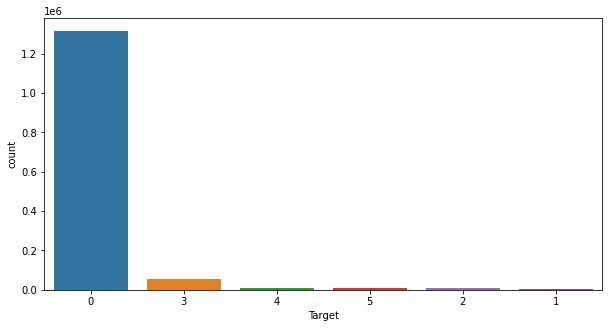

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data['Target'],label="Count")
plt.show()

## Distribución de Marcas Target

In [ ]:
dist_marcas = data.groupby(["Gerencia2","SubCanal2","Categoria","Target"]).size().to_frame().rename(columns={0:"Cantidad"}).sort_values(by="Cantidad", ascending=False).reset_index()
dist_marcas = dist_marcas[~dist_marcas["Target"].isin([0])]
dist_marcas.head(20)

,Gerencia2,SubCanal2,Categoria,Target,Cantidad
94,Gerencia_10,Subcanal_3,Categoria_3,3,3231
109,Gerencia_10,Subcanal_3,Categoria_2,3,2861
141,Gerencia_6,Subcanal_3,Categoria_2,3,1860
147,Gerencia_9,Subcanal_3,Categoria_2,3,1651
178,Gerencia_10,Subcanal_1,Categoria_3,3,1229
180,Gerencia_9,Subcanal_3,Categoria_3,3,1199
199,Gerencia_6,Subcanal_3,Categoria_3,3,1007
202,Gerencia_10,Subcanal_3,Categoria_1,3,998
210,Gerencia_10,Subcanal_3,Categoria_2,4,949
211,Gerencia_10,Subcanal_3,Categoria_2,5,949


## Análisis de venta de marcas Target por mes

In [ ]:
mes_marcas = data.groupby(["Año","Mes","Target"]).size().to_frame().rename(columns={0:"Cantidad"}).sort_values(by="Cantidad", ascending=False).reset_index()
mes_marcas["Date"] = mes_marcas['Año'].map(str) + '-' + mes_marcas['Mes'].map(str)
mes_marcas["Date"] = pd.to_datetime(mes_marcas["Date"])
mes_marcas["Date"] = mes_marcas["Date"].dt.to_period(freq = "M")
mes_marcas = mes_marcas.drop(['Año', 'Mes'], axis=1)
mes_marcas = pd.pivot_table(mes_marcas, values='Cantidad', index=['Date'],
                    columns=['Target'], aggfunc=np.sum)

mes_marcas.fillna(0,inplace=True)
mes_marcas

Target,0,1,2,3,4,5
Date,,,,,,
2019-05,73131.0,0.0,798.0,3175.0,0.0,0.0
2019-06,74550.0,0.0,722.0,3317.0,0.0,0.0
2019-07,77461.0,0.0,752.0,3465.0,0.0,0.0
2019-08,82880.0,0.0,726.0,4040.0,0.0,0.0
2019-09,83146.0,0.0,857.0,3834.0,0.0,0.0
2019-10,83214.0,0.0,766.0,3784.0,0.0,0.0
2019-11,86012.0,0.0,962.0,3622.0,0.0,0.0
2019-12,80784.0,0.0,973.0,4655.0,0.0,0.0
2020-01,76199.0,0.0,893.0,3452.0,0.0,0.0


Text(0.5, 1.0, 'Cantidad de venta por marca x mes')

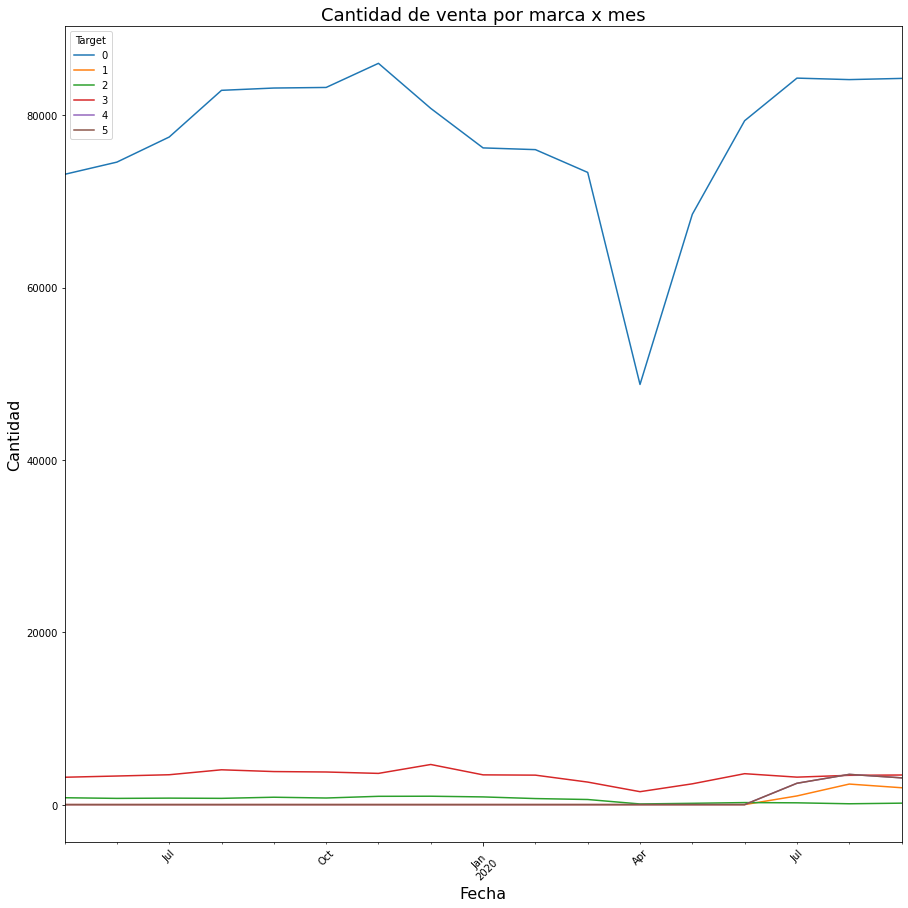

In [ ]:
mes_marcas.plot(rot=45, figsize=(15,15))
plt.xlabel("Fecha",size=16)
plt.ylabel("Cantidad",size=16)
plt.title("Cantidad de venta por marca x mes", size=18)

Como vemos el "0" osea aquellas marcas que no son de nuestro interes son mayor en ventas, lo eliminaré solo para el análisis y poder ver las que si son de nuestro interes

Text(0.5, 1.0, 'Cantidad de venta por marca')

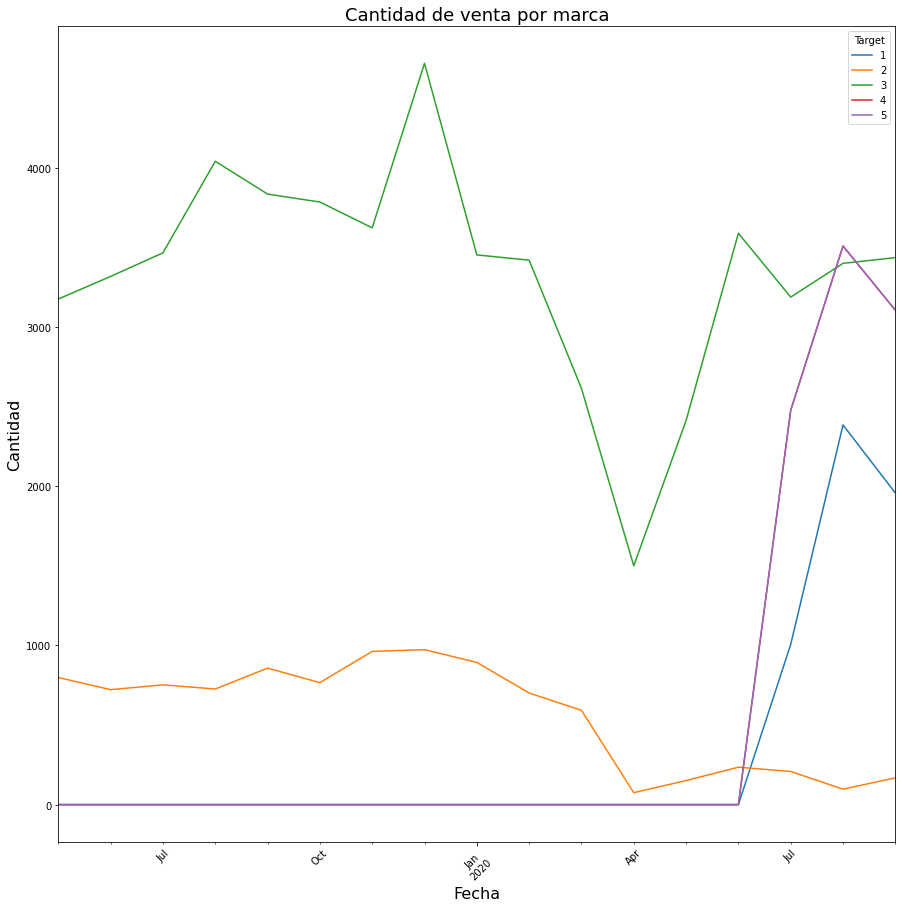

In [ ]:
mes_marcas = mes_marcas.drop([0], axis=1)
mes_marcas.plot(rot=45, figsize=(15,15))
plt.xlabel("Fecha",size=16)
plt.ylabel("Cantidad",size=16)
plt.title("Cantidad de venta por marca", size=18)

Vemos que las Marcas_1 y las Marcas de Innovación iniciaron sus ventas en Junio del 2020, por lo que las de Innovación fueron de mayor pedido que la Marca_1

## Revisión de compra de Cliente por tipo de Marca

In [ ]:
data.groupby(["Cliente",'Target']).size().to_frame().rename(columns={0:"Cantidad"})

Cantidad
Cliente Target          
1       0              8
        4              2
        5              2
2       0             28
        1              2
...                  ...
20569   5              1
20577   4              1
        5              1
20580   4              2
        5              2

[43481 rows x 1 columns]

In [ ]:
data.to_csv("input_modelo.csv")

#Transformación de datos

## Manejo de outliers

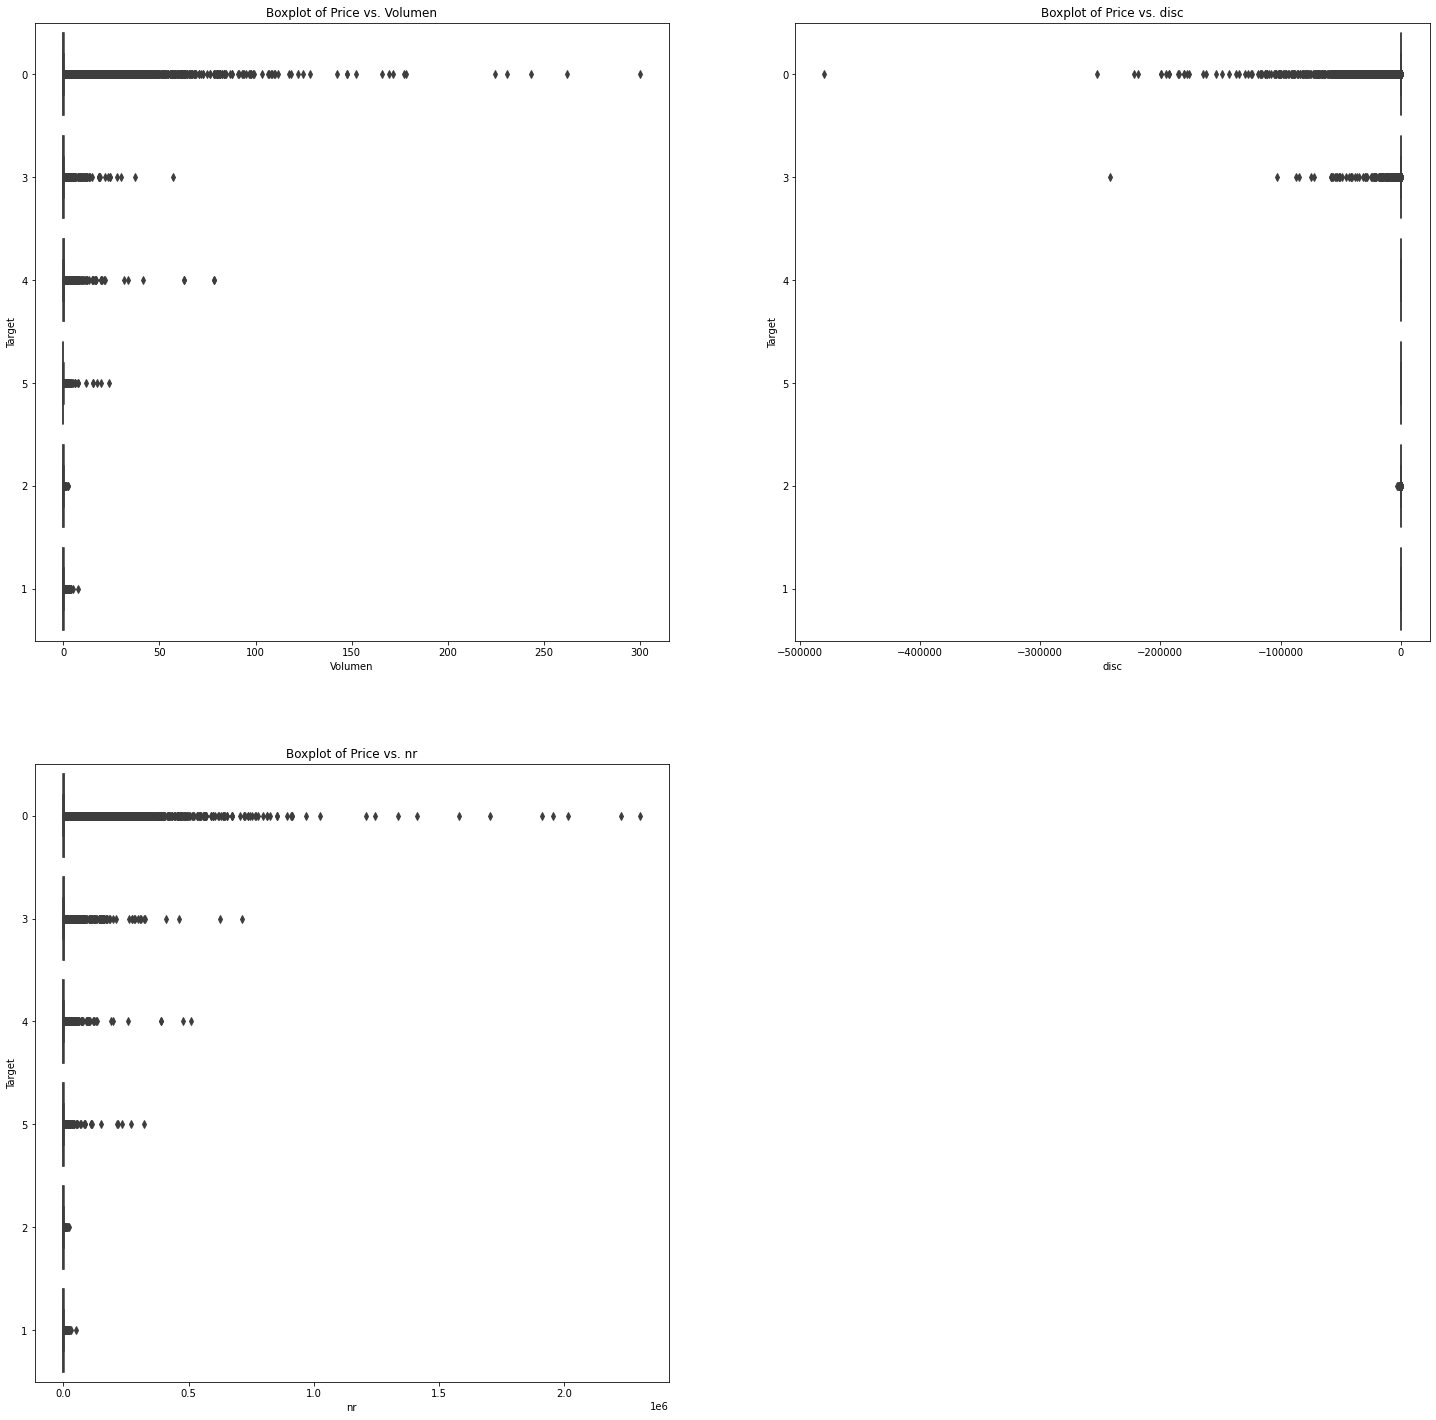

In [ ]:
plt.figure(figsize=(25,25))
vars_to_plot = ['Volumen', 'disc', 'nr']
for i, var in enumerate(vars_to_plot):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = var, y='Target', data = data)
    title_string = "Boxplot of Price vs. " + var
    plt.ylabel("Target")
    plt.title(title_string)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


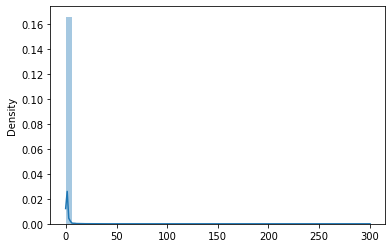

In [ ]:
sns.distplot(data.Volumen.values)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


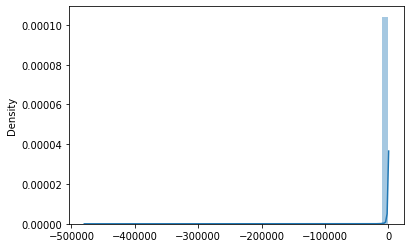

In [ ]:
sns.distplot(data.disc.values)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


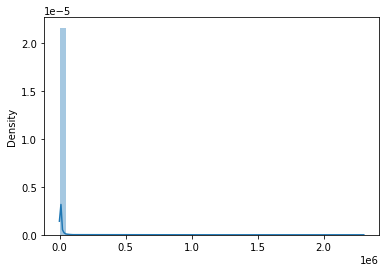

In [ ]:
sns.distplot(data.nr.values)

In [ ]:
#Escojo solo los valores numéricos que tienen una distribución con colas muy largas



#volumen
q25,q75 = np.percentile(data.Volumen.values, [25,75])
iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr
data = data[(data.Volumen >= minimo) & (data.Volumen <= maximo)]

#disc
q25,q75 = np.percentile(data.disc.values, [25,75])
iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr
data = data[(data.disc >= minimo) & (data.disc <= maximo)]

#nr
q25,q75 = np.percentile(data.nr.values, [25,75])
iqr = q75 - q25
minimo = q25 - 1.5*iqr
maximo = q75 + 1.5*iqr
data = data[(data.nr >= minimo) & (data.nr <= maximo)]

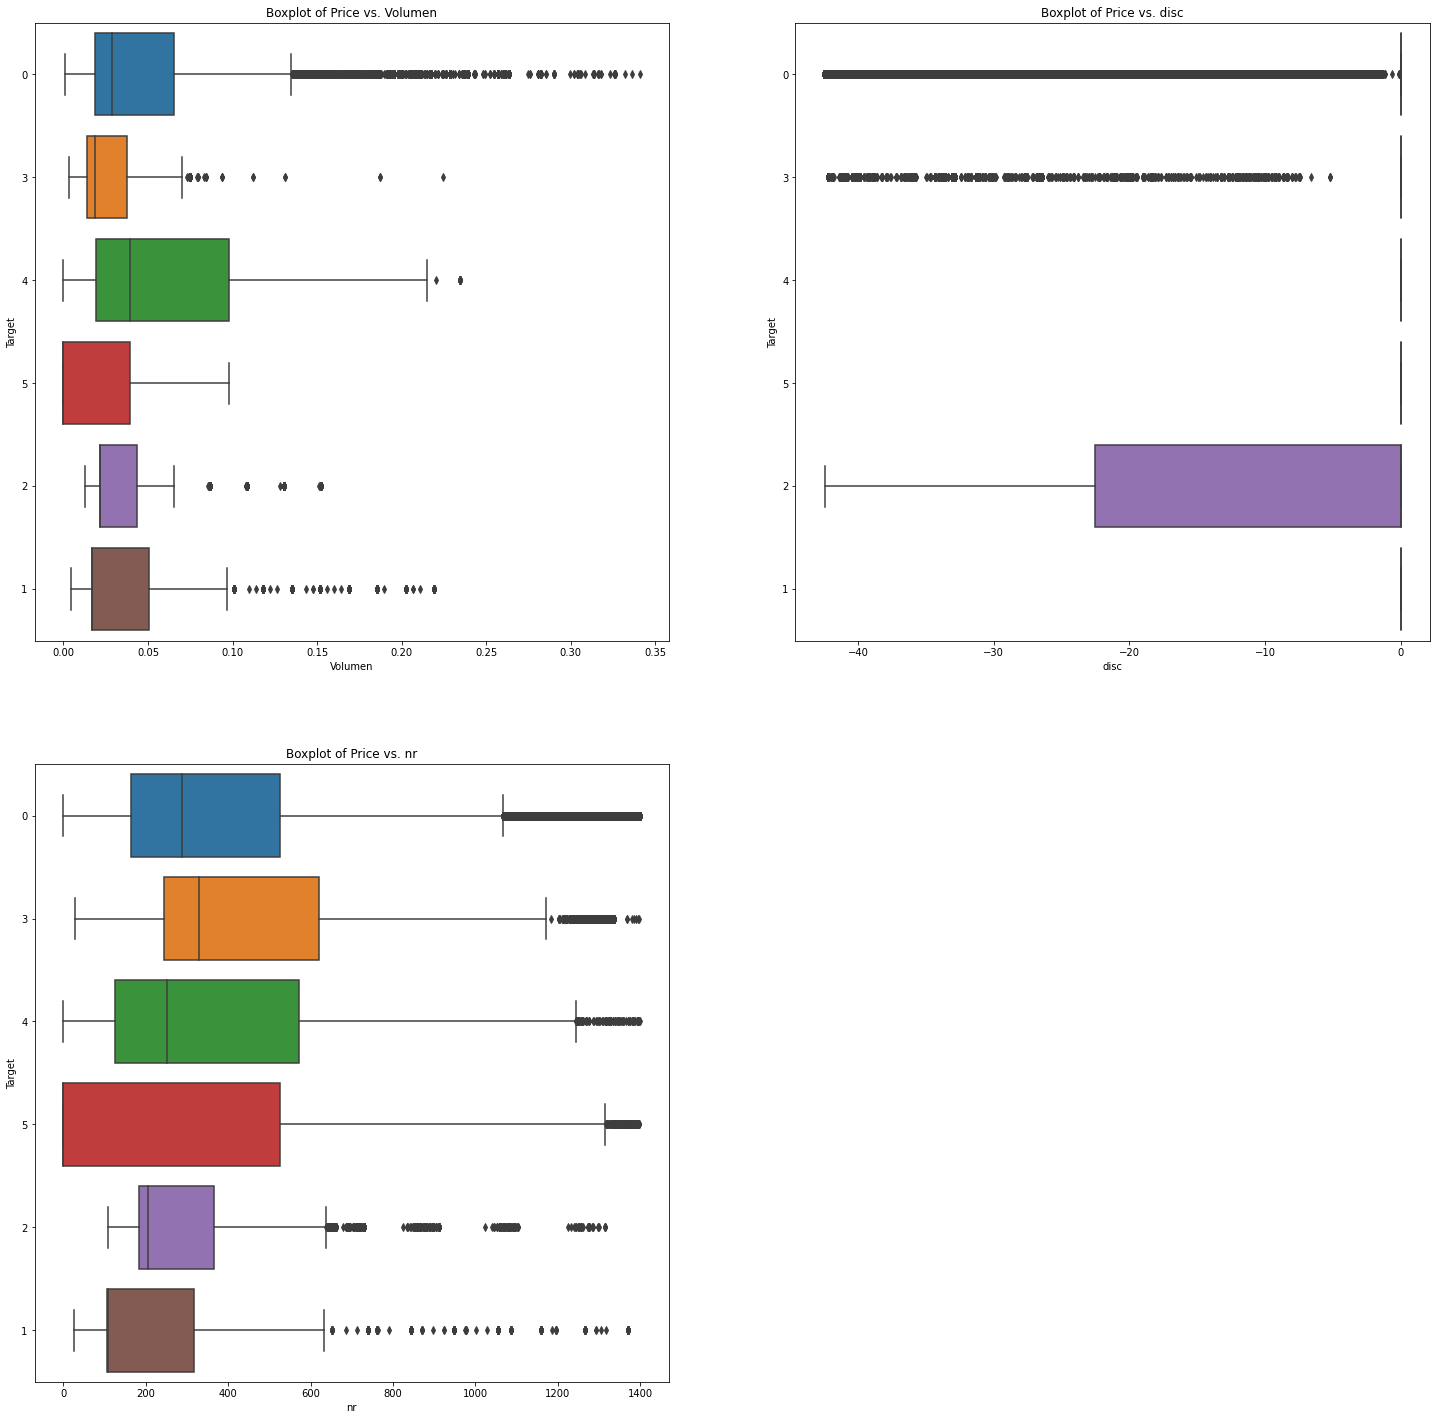

In [ ]:
plt.figure(figsize=(25,25))
vars_to_plot = ['Volumen', 'disc', 'nr']
for i, var in enumerate(vars_to_plot):
    plt.subplot(2,2,i+1)
    sns.boxplot(x = var, y='Target', data = data)
    title_string = "Boxplot of Price vs. " + var
    plt.ylabel("Target")
    plt.title(title_string)

In [ ]:
data

,Año,Mes,Cliente,SegmentoPrecio2,Marca2,Cupo2,CapacidadEnvase2,Volumen,disc,nr,Regional2,Gerencia2,SubCanal2,Categoria,Nevera,Target
0,2019,5,10,SegmentoPrecio_1,Marca_1,Cupo_1,CapacidadEnvase_12,0.112229,-30.590603,900.328567,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1,0
1,2019,5,10,SegmentoPrecio_1,Marca_2,Cupo_2,CapacidadEnvase_10,0.021734,0.000000,149.184463,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1,0
2,2019,5,10,SegmentoPrecio_2,Marca_3,Cupo_2,CapacidadEnvase_10,0.043469,0.000000,359.625828,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1,0
3,2019,5,10,SegmentoPrecio_1,Marca_1,Cupo_2,CapacidadEnvase_16,0.026345,-31.065261,134.748399,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1,0
4,2019,5,10,SegmentoPrecio_1,Marca_4,Cupo_2,CapacidadEnvase_10,0.086938,0.000000,496.901005,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406111,2020,8,20577,SegmentoPrecio_3,Marca_39,Cupo_2,CapacidadEnvase_10,0.039122,0.000000,544.150314,Regional 1,Gerencia_8,Subcanal_3,Categoria_2,0,5
1406112,2020,7,20580,SegmentoPrecio_1,Marca_38,Cupo_2,CapacidadEnvase_10,0.000000,0.000000,0.000000,Regional 1,Gerencia_10,Subcanal_5,Categoria_6,0,4
1406113,2020,7,20580,SegmentoPrecio_3,Marca_39,Cupo_2,CapacidadEnvase_10,0.058683,0.000000,759.218996,Regional 1,Gerencia_10,Subcanal_5,Categoria_6,0,5
1406114,2020,9,20580,SegmentoPrecio_1,Marca_38,Cupo_2,CapacidadEnvase_10,0.000000,0.000000,0.000000,Regional 1,Gerencia_10,Subcanal_5,Categoria_6,0,4


## Encoding

### Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
data_ = data.copy()
# creating instance of labelencoder
labelencoder = LabelEncoder()

# Assigning numerical values and storing in another column
data_['Marca2'] = labelencoder.fit_transform(data_['Marca2'])
data_['Año'] = labelencoder.fit_transform(data_['Año'])
data_['Mes'] = labelencoder.fit_transform(data_['Mes'])
data_['CapacidadEnvase2'] = labelencoder.fit_transform(data_['CapacidadEnvase2'])

data_

,Año,Mes,Cliente,SegmentoPrecio2,Marca2,Cupo2,CapacidadEnvase2,Volumen,disc,nr,Regional2,Gerencia2,SubCanal2,Categoria,Nevera,Target
0,0,4,10,SegmentoPrecio_1,0,Cupo_1,3,0.112229,-30.590603,900.328567,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1,0
1,0,4,10,SegmentoPrecio_1,11,Cupo_2,1,0.021734,0.000000,149.184463,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1,0
2,0,4,10,SegmentoPrecio_2,22,Cupo_2,1,0.043469,0.000000,359.625828,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1,0
3,0,4,10,SegmentoPrecio_1,0,Cupo_2,7,0.026345,-31.065261,134.748399,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1,0
4,0,4,10,SegmentoPrecio_1,33,Cupo_2,1,0.086938,0.000000,496.901005,Regional 1,Gerencia_3,Subcanal_1,Categoria_2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406111,1,7,20577,SegmentoPrecio_3,32,Cupo_2,1,0.039122,0.000000,544.150314,Regional 1,Gerencia_8,Subcanal_3,Categoria_2,0,5
1406112,1,6,20580,SegmentoPrecio_1,31,Cupo_2,1,0.000000,0.000000,0.000000,Regional 1,Gerencia_10,Subcanal_5,Categoria_6,0,4
1406113,1,6,20580,SegmentoPrecio_3,32,Cupo_2,1,0.058683,0.000000,759.218996,Regional 1,Gerencia_10,Subcanal_5,Categoria_6,0,5
1406114,1,8,20580,SegmentoPrecio_1,31,Cupo_2,1,0.000000,0.000000,0.000000,Regional 1,Gerencia_10,Subcanal_5,Categoria_6,0,4


In [ ]:
data_ = data_.drop(["Regional2"], axis=1)

### One-Hot Encoding

In [ ]:
data_ = pd.get_dummies(data_, columns=['SegmentoPrecio2','Cupo2','Gerencia2', 'SubCanal2', 'Categoria'])

data_

,Año,Mes,Cliente,Marca2,CapacidadEnvase2,Volumen,disc,nr,Nevera,Target,SegmentoPrecio2_SegmentoPrecio_1,SegmentoPrecio2_SegmentoPrecio_2,SegmentoPrecio2_SegmentoPrecio_3,Cupo2_Cupo_1,Cupo2_Cupo_2,Cupo2_Cupo_3,Cupo2_Cupo_4,Cupo2_Cupo_5,Gerencia2_Gerencia_1,Gerencia2_Gerencia_10,Gerencia2_Gerencia_11,Gerencia2_Gerencia_2,Gerencia2_Gerencia_3,Gerencia2_Gerencia_4,Gerencia2_Gerencia_5,Gerencia2_Gerencia_6,Gerencia2_Gerencia_7,Gerencia2_Gerencia_8,Gerencia2_Gerencia_9,SubCanal2_Subcanal_1,SubCanal2_Subcanal_10,SubCanal2_Subcanal_11,SubCanal2_Subcanal_12,SubCanal2_Subcanal_13,SubCanal2_Subcanal_14,SubCanal2_Subcanal_15,SubCanal2_Subcanal_16,SubCanal2_Subcanal_17,SubCanal2_Subcanal_18,SubCanal2_Subcanal_19,SubCanal2_Subcanal_2,SubCanal2_Subcanal_20,SubCanal2_Subcanal_21,SubCanal2_Subcanal_22,SubCanal2_Subcanal_23,SubCanal2_Subcanal_26,SubCanal2_Subcanal_28,SubCanal2_Subcanal_3,SubCanal2_Subcanal_31,SubCanal2_Subcanal_32,SubCanal2_Subcanal_4,SubCanal2_Subcanal_5,SubCanal2_Subcanal_6,SubCanal2_Subcanal_7,SubCanal2_Subcanal_8,SubCanal2_Subcanal_9,Categoria_Categoria_1,Categoria_Categoria_2,Categoria_Categoria_3,Categoria_Categoria_4,Categoria_Categoria_5,Categoria_Categoria_6
0,0,4,10,0,3,0.112229,-30.590603,900.328567,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,4,10,11,1,0.021734,0.000000,149.184463,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,4,10,22,1,0.043469,0.000000,359.625828,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,4,10,0,7,0.026345,-31.065261,134.748399,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,4,10,33,1,0.086938,0.000000,496.901005,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406111,1,7,20577,32,1,0.039122,0.000000,544.150314,0,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1406112,1,6,20580,31,1,0.000000,0.000000,0.000000,0,4,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1406113,1,6,20580,32,1,0.058683,0.000000,759.218996,0,5,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1406114,1,8,20580,31,1,0.000000,0.000000,0.000000,0,4,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [ ]:
data_ = data_.drop(["Año", "Mes"], axis=1)

## Escalado de datos

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_[['Marca2',	'CapacidadEnvase2',	'Volumen',	'disc',	'nr',	'Nevera']] = scaler.fit_transform(data_[['Marca2',	'CapacidadEnvase2',	'Volumen',	'disc',	'nr',	'Nevera']])
data_

,Cliente,Marca2,CapacidadEnvase2,Volumen,disc,nr,Nevera,Target,SegmentoPrecio2_SegmentoPrecio_1,SegmentoPrecio2_SegmentoPrecio_2,SegmentoPrecio2_SegmentoPrecio_3,Cupo2_Cupo_1,Cupo2_Cupo_2,Cupo2_Cupo_3,Cupo2_Cupo_4,Cupo2_Cupo_5,Gerencia2_Gerencia_1,Gerencia2_Gerencia_10,Gerencia2_Gerencia_11,Gerencia2_Gerencia_2,Gerencia2_Gerencia_3,Gerencia2_Gerencia_4,Gerencia2_Gerencia_5,Gerencia2_Gerencia_6,Gerencia2_Gerencia_7,Gerencia2_Gerencia_8,Gerencia2_Gerencia_9,SubCanal2_Subcanal_1,SubCanal2_Subcanal_10,SubCanal2_Subcanal_11,SubCanal2_Subcanal_12,SubCanal2_Subcanal_13,SubCanal2_Subcanal_14,SubCanal2_Subcanal_15,SubCanal2_Subcanal_16,SubCanal2_Subcanal_17,SubCanal2_Subcanal_18,SubCanal2_Subcanal_19,SubCanal2_Subcanal_2,SubCanal2_Subcanal_20,SubCanal2_Subcanal_21,SubCanal2_Subcanal_22,SubCanal2_Subcanal_23,SubCanal2_Subcanal_26,SubCanal2_Subcanal_28,SubCanal2_Subcanal_3,SubCanal2_Subcanal_31,SubCanal2_Subcanal_32,SubCanal2_Subcanal_4,SubCanal2_Subcanal_5,SubCanal2_Subcanal_6,SubCanal2_Subcanal_7,SubCanal2_Subcanal_8,SubCanal2_Subcanal_9,Categoria_Categoria_1,Categoria_Categoria_2,Categoria_Categoria_3,Categoria_Categoria_4,Categoria_Categoria_5,Categoria_Categoria_6
0,10,-1.306803,-0.260304,1.550655,-2.931171,1.669861,0.847274,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,10,-0.600709,-0.759032,-0.591128,0.418301,-0.758061,0.847274,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,10,0.105384,-0.759032,-0.076726,0.418301,-0.077851,0.847274,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,10,-1.306803,0.737151,-0.482012,-2.983143,-0.804722,0.847274,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,10,0.811478,-0.759032,0.952078,0.418301,0.365863,0.847274,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406111,20577,0.747288,-0.759032,-0.179606,0.418301,0.518587,-1.180256,5,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1406112,20580,0.683098,-0.759032,-1.105530,0.418301,-1.240269,-1.180256,4,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1406113,20580,0.747288,-0.759032,0.283356,0.418301,1.213753,-1.180256,5,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1406114,20580,0.683098,-0.759032,-1.105530,0.418301,-1.240269,-1.180256,4,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
